In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("C:/Users/Loges/Downloads/Datasets/auto-mpg.csv")
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger


In [3]:
data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [4]:
for col in data.columns:
    print(data[data[col].isnull()])
data=data.dropna(axis=0,how='any')

Empty DataFrame
Columns: [mpg, cylinders, displacement, horsepower, weight, acceleration, model year, origin, car name]
Index: []
Empty DataFrame
Columns: [mpg, cylinders, displacement, horsepower, weight, acceleration, model year, origin, car name]
Index: []
Empty DataFrame
Columns: [mpg, cylinders, displacement, horsepower, weight, acceleration, model year, origin, car name]
Index: []
      mpg  cylinders  displacement  horsepower  weight  acceleration  \
32   25.0          4          98.0         NaN    2046          19.0   
126  21.0          6         200.0         NaN    2875          17.0   
330  40.9          4          85.0         NaN    1835          17.3   
336  23.6          4         140.0         NaN    2905          14.3   
354  34.5          4         100.0         NaN    2320          15.8   
374  23.0          4         151.0         NaN    3035          20.5   

     model year  origin              car name  
32           71       1            ford pinto  
126      

In [5]:
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger


C:\Users\Loges\AppData\Local\Temp\ipykernel_24392\1119197534.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True)


<Axes: >

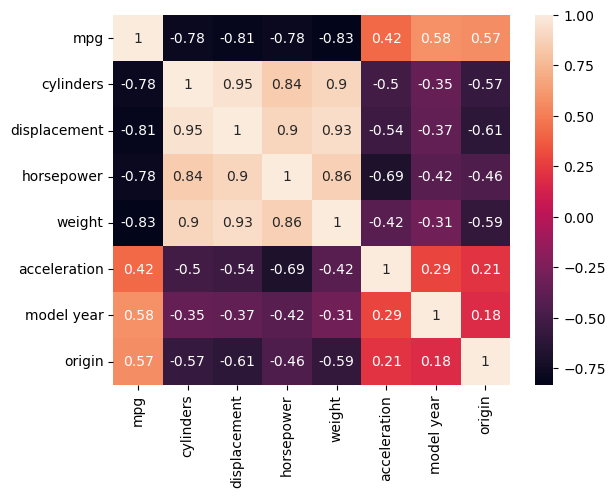

In [19]:
sns.heatmap(data.corr(), annot=True)

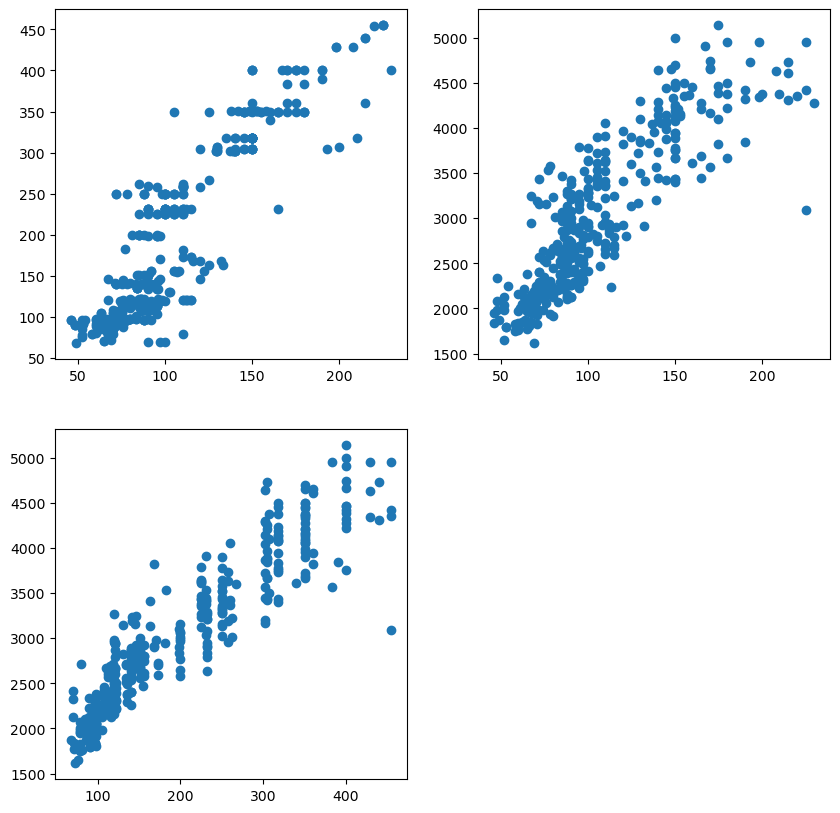

In [29]:
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.scatter(data['horsepower'],data['displacement'])

plt.subplot(2,2,2)
plt.scatter(data['horsepower'], data['weight'])

plt.subplot(2,2,3)
plt.scatter(data['displacement'], data['weight'])

plt.show()

### Linear Regression

#### with Regular Dataset

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [7]:
predictors = data.iloc[:,1:7]
predictors

,cylinders,displacement,horsepower,weight,acceleration,model year
0,8,307.0,130.0,3504,12.0,70
1,8,350.0,165.0,3693,11.5,70
2,8,318.0,150.0,3436,11.0,70
3,8,304.0,150.0,3433,12.0,70
4,8,302.0,140.0,3449,10.5,70
...,...,...,...,...,...,...
393,4,140.0,86.0,2790,15.6,82
394,4,97.0,52.0,2130,24.6,82
395,4,135.0,84.0,2295,11.6,82
396,4,120.0,79.0,2625,18.6,82


In [8]:
target = data.iloc[:,0]
target

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 392, dtype: float64

In [9]:
p_train,p_test,t_train,t_test=train_test_split(predictors,target,test_size=0.3,random_state=123)
lm=linear_model.LinearRegression()

In [10]:
model=lm.fit(p_train,t_train)

In [11]:
pred=model.predict(p_test)
print(mean_squared_error(t_test,pred),r2_score(t_test,pred))

13.628322750797642 0.7611620501999116


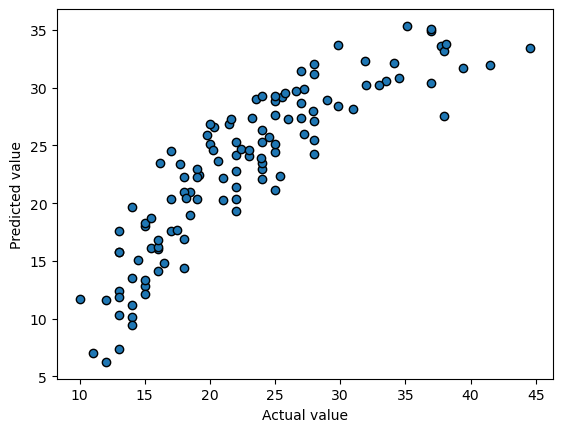

In [12]:
plt.scatter(t_test,pred,edgecolor='k')
plt.xlabel('Actual value')
plt.ylabel('Predicted value')
plt.show()

### with Principal Component Analysis

In [13]:
predictors=StandardScaler().fit_transform(predictors)

In [ ]:
pca=PCA(n_components=2)
princomp=pca.fit_transform(predictors)
princomp

In [15]:
pc_train,pc_test,tc_train,tc_test=train_test_split(princomp,target,test_size=0.3,random_state=123)

In [16]:
model2=lm.fit(pc_train,tc_train)
pred2=model2.predict(pc_test)

In [17]:
print(mean_squared_error(tc_test,pred2),r2_score(tc_test,pred2))

18.041199522281456 0.6838258687714273
